# Importations


Importation de bibliothèques importantes.

In [ ]:
import io
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt



# Chargement du fichier

Le jeu de donnée présenté dans ce travail décrit le transport du marchandise d'un port par des transporteurs. 


Importation du fichier et création d'une Pandas Dataframe a partir des données.

In [ ]:
path ="/content/Dataset1 (1).xlsx"
df = pd.read_excel(path)
df

,Num_escale,Num_Vehicule,Num_REMORQUE,Num_Client,Date_entrée,Heure_entrée,Date_sortie,Heure_sortie,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie,Produit
0,Escale105,Vehicule1,Remorque1,Client1,2020-01-02,08:48,2020-01-02,06:58,43220,15760,14,14.0,TRTX DE SOJA
1,Escale106,Vehicule2,Remorque2,Client1,2020-01-02,08:47,2020-01-02,07:00,42460,16480,17,17.0,PULPE DE BETTRAVE
2,Escale106,Vehicule3,Remorque3,Client1,2020-01-02,11:17,2020-01-02,07:02,42940,16600,17,17.0,PULPE DE BETTRAVE
3,Escale105,Vehicule4,Remorque4,Client1,2020-01-02,08:46,2020-01-02,07:03,42560,14700,14,14.0,TRTX DE SOJA
4,Escale106,Vehicule5,Remorque5,Client1,2020-01-02,10:05,2020-01-02,07:03,42020,16300,17,17.0,PULPE DE BETTRAVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70604,Escale27,Vehicule426,Remorque449,Client1,2020-06-09,13:07,2020-06-09,12:05,41400,15580,19,19.0,TRT DE TOURNESOL
70605,Escale25,Vehicule61,Remorque61,Client2,2020-06-09,12:58,2020-06-09,12:07,42580,17380,7,14.0,DDGS
70606,Escale25,Vehicule2474,Remorque4137,Client2,2020-06-09,13:09,2020-06-09,12:08,42320,17780,7,14.0,DDGS
70607,Escale25,Vehicule59,Remorque59,Client2,2020-06-09,13:17,2020-06-09,12:21,42640,17860,7,7.0,DDGS


# Recharche des valeurs manquantes

Inspection basique de la data set, on supprime les lignes avec des valeurs manquantes.

In [ ]:
nan_df = df[df.isna().any(axis=1)]
nan_df.describe()

,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie
count,9.000000,9.000000,9.000000,3.000000
mean,41653.333333,16277.777778,11.777778,13.000000
std,2201.953678,981.908572,5.190804,5.567764
min,37380.000000,14960.000000,7.000000,7.000000
25%,40820.000000,15820.000000,7.000000,10.500000
50%,41540.000000,15880.000000,10.000000,14.000000
75%,43820.000000,17140.000000,18.000000,16.000000
max,43940.000000,17660.000000,18.000000,18.000000


In [ ]:
df.dropna(inplace=True)
df.describe()

,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie
count,70600.000000,70600.000000,70600.000000,70600.000000
mean,42018.032011,16120.752408,13.558031,13.234476
std,2127.781012,833.683555,4.607503,4.697484
min,6760.000000,3760.000000,7.000000,7.000000
25%,41400.000000,15620.000000,7.000000,7.000000
50%,42580.000000,16100.000000,14.000000,14.000000
75%,43400.000000,16620.000000,18.000000,18.000000
max,44000.000000,19960.000000,19.000000,19.000000


# Analyse du poids à vide 

Analyse de la colonne poids à vide et sa distribution.

In [ ]:
poids_vide = pd.DataFrame(df['Poids_vide'])
poids_vide.describe()

,Poids_vide
count,70600.000000
mean,16120.752408
std,833.683555
min,3760.000000
25%,15620.000000
50%,16100.000000
75%,16620.000000
max,19960.000000


la distribution est presque une distribution normale gaussiennne avec la majorité des camions autour de la moyenne qui est 16120 Kg 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7c81d26d0>]],
      dtype=object)

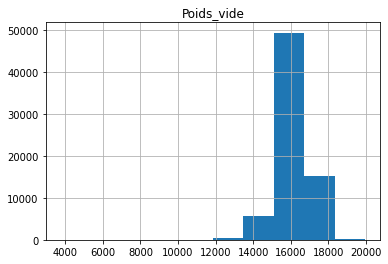

In [ ]:

poids_vide.hist()


On analysant la boite à moustache on constate qu'il existe deux valeurs minimales bizzares car ils sont seulement deux observations et ils sont très loins des autres valeurs du premier quartile.

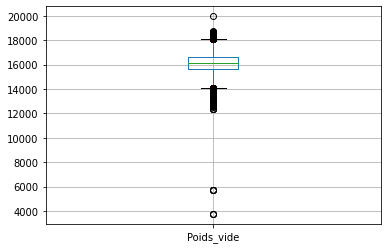

In [ ]:
poids_vide.boxplot()

In [ ]:
q = poids_vide.quantile([0.00, 0.25, 0.50, 0.75, 1.00])
col = "Poids_vide"
q1 = poids_vide[((poids_vide[col]>=q[col][0.00]) & (poids_vide[col]<q[col][0.25]))]
q1.describe()


,Poids_vide
count,17414.000000
mean,15083.832549
std,557.540388
min,3760.000000
25%,14900.000000
50%,15260.000000
75%,15460.000000
max,15600.000000


# Classification des transporteurs par écart type en trois listes (Noires,Rouges,Jaunes)

On groupe les couples par remorques et on calcules pour chaque remorque la moyenne du poids vide de tous les voyages qu'elle a fait et l'écart type du poids vide de tous ces voyages.

In [ ]:
stats=df.groupby(['Num_REMORQUE']).mean()["Poids_vide"]
stds = df.groupby(['Num_REMORQUE']).std()["Poids_vide"]
stats = pd.DataFrame(stats)
stats["poids_vide_std"]=stds
#means= stats.groupby("Num_REMORQUE").mean()["Poids_vide"]

stats



,Poids_vide,poids_vide_std
Num_REMORQUE,,
Remorque1,15639.829060,127.833289
Remorque10,15843.877551,119.402573
Remorque100,15843.736264,219.553326
Remorque1000,16380.000000,NaN
Remorque1001,15900.000000,84.852814
...,...,...
Remorque995,15247.419355,82.342443
Remorque996,15752.972973,203.061095
Remorque997,15920.000000,NaN


on élimine les valeurs manquantes

In [ ]:
df_q3= df[['Poids_vide','Num_REMORQUE']].dropna()
df_q3

,Poids_vide,Num_REMORQUE
0,15760,Remorque1
1,16480,Remorque2
2,16600,Remorque3
3,14700,Remorque4
4,16300,Remorque5
...,...,...
70604,15580,Remorque449
70605,17380,Remorque61
70606,17780,Remorque4137
70607,17860,Remorque59


l'objectif de calcule de la moyenne du poids vide de tous les voyages qu'a fait chaque remorque est de créer une dataframe dont laquelle on va calculer les écarts de chaque observation de poids_vide de remorque avec la moyenne de poids_vide de tous les voyages qu'a fait cette remorque pour voir est ce que le poids de remorque change d'un voyage a un autre d'une manière anormale.

Pour ce faire on stock dans un dictionnaire les valeurs moyennes e poids_vide de tous les voyages qu'a fait et on calcule la difference avec le poids vide constaté et on stock la difference dans un dataframe appelé df_test.

In [ ]:
df_test= pd.DataFrame(columns = ['escale','ecart_mean'])

dic_mean = {}
dic_std = {}
for i,j in stats.iterrows():
    dic_mean[i]=j[0]
    dic_std[i]=j[1] 
for i, j in df_q3.iterrows():  
    df_test=df_test.append({'escale' : i, 'ecart_mean': j[0]-dic_mean[j[1]]},ignore_index = True)

la dataFrame des differences entre le poids_vide constaté et la moyenne de tous les voyages.

In [ ]:
df_test

,escale,ecart_mean
0,0.0,120.170940
1,1.0,-22.765957
2,2.0,1251.235955
3,3.0,42.307692
4,4.0,-32.439024
...,...,...
70595,70604.0,9.247312
70596,70605.0,45.185185
70597,70606.0,-160.000000
70598,70607.0,18.958333


Pour classifier selon des listes (noires, jaunes,rouges) on propose prendre cette difference qu'on a dèja calculé et diviser par la moyenne des écart type de chacun des voyages de remorques, en d'autres termes si la différence qu'on a calculé est plus de 2 foit écart type alors c'est alarmant, on met cet élement dans la liste noire, si entre une fois écart type et 2 fois écart type liste rouge si moins d'écart type liste jaune. 

In [ ]:
observed_std=df.groupby(['Num_REMORQUE'])['Poids_vide'].std().mean()
def classifier(ecart):
  if ecart/observed_std >= 2 :
    return 'Noire'
  elif 1 < ecart/observed_std < 2:
    return 'Rouge'
  else  :
    return 'Jaune' 

après la classification on ajoute une autre colonne "Groupe" au DataFrame initiale pour indiquer la liste auquel un remorque appartient.

In [48]:
#assign(Groupe = lambda x:  classifier(abs(x['ecart_mean'])))
df["Groupe"] = df_test.apply(lambda x:  classifier(abs(x.ecart_mean)), axis=1)
df

,Num_escale,Num_Vehicule,Num_REMORQUE,Num_Client,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie,Produit,temps_datt,Count,diff_pont,covid,mois,Groupe
0,7,0,0,0,43220,15760,14,14.0,33,6600.0,1,0,1,2,Jaune
1,8,1111,1111,0,42460,16480,17,17.0,23,6420.0,1,0,1,2,Jaune
2,8,1720,2222,0,42940,16600,17,17.0,23,15300.0,1,0,1,2,Noire
3,7,1831,3333,0,42560,14700,14,14.0,33,6180.0,1,0,1,2,Jaune
4,8,1942,3634,0,42020,16300,17,17.0,23,10920.0,1,0,1,2,Jaune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70595,85,391,360,5,43020,15160,14,7.0,4,3720.0,1,1,0,3,Jaune
70596,42,2176,3868,11,41220,15860,7,7.0,10,3060.0,1,0,0,3,Jaune
70597,42,1112,1112,11,39040,15600,7,7.0,10,3660.0,1,0,0,3,Rouge
70598,42,960,1946,11,41660,16560,7,7.0,10,3360.0,1,0,0,3,Jaune


# Analyse du temps d'attente

Calcule de temps d'attente entre chaque pesage vide et pesage chargé.

In [ ]:
from datetime import datetime
time_df=pd.DataFrame(columns=["vehicule","remorque","Temps d’attente"])
pd.to_datetime(df['Date_entrée'])
pd.to_datetime(df['Date_sortie'])

for i,j in df.iterrows():
    date_entre = j[4].strftime("%m/%d/%Y")
    date_sortie = j[6].strftime("%m/%d/%Y")
    temps_sortie=date_sortie+", "+ j[7]
    temps_entre=date_entre+", "+ j[5]
    temps_sortie=datetime.strptime(temps_sortie, "%m/%d/%Y, %H:%M")
    temps_entre=datetime.strptime(temps_entre, "%m/%d/%Y, %H:%M")
    time_delta=(temps_sortie-temps_entre)
    time_df=time_df.append({'vehicule':j[1],"remorque":j[2],'Temps d’attente':(time_delta/60)*(-1)},ignore_index = True)
  



Temps d'attente en seconds.

In [ ]:
60*time_df['Temps d’attente'].dt.total_seconds().describe()

count    4.236000e+06
mean     1.291589e+04
std      1.236306e+04
min     -3.936000e+04
25%      5.040000e+03
50%      8.880000e+03
75%      1.632000e+04
max      1.857600e+05
Name: Temps d’attente, dtype: float64

In [ ]:
df['Count'] = 1
df["temps_datt"]=time_df['Temps d’attente']
groupat_temps=df.groupby(['temps_datt','Groupe']).count()
df_viz_temps = df[['temps_datt','Groupe','Count']]
dff_temps=df_viz_temps.groupby(['temps_datt','Groupe']).count()
df_vizual_temps = dff_temps.unstack()
time_noir = df[df["Groupe"]=="Noire"]
60*time_noir['temps_datt'].dt.total_seconds().describe()


count    265500.000000
mean      13247.172881
std       12894.082091
min       -5220.000000
25%        4980.000000
50%        9000.000000
75%       16560.000000
max      103680.000000
Name: temps_datt, dtype: float64

# Analyse par destination

on fait un analyse par destination en groupant chaque client avec le groupe c'est a dire la liste des camions qui vont chez lui pour voir si il y'a une correlation.

In [ ]:

df_viz = df[['Num_Client','Groupe','Count']]
#df_viz.plot(kind = 'bar', stacked = True,  color = ['y','r','b'])

On constatant la figure çi-dessous dans laquel on trace un plot a bar dans lequel pour chaque client la fréquence de chaque groupe.

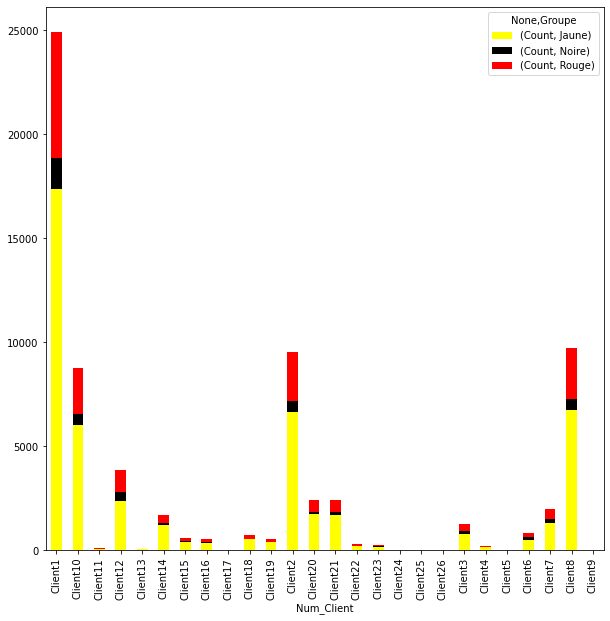

In [ ]:
dff=df_viz.groupby(['Num_Client','Groupe']).count()
values =dff.values
#jaune =values[[i  for i in range(len(values)) if i \\3 == 0]]
noire =[]
rouge =[]
j = 0
n = 1
r = 2
df_vizual = dff.unstack()
groupat=df.groupby(['Num_Client','Groupe']).count()["Poids_vide"]
groupat = pd.DataFrame(groupat)
groupat.rename(columns = {'Poids_vide' : 'Count'})
df_viz = df[['Num_Client','Groupe','Count']]
df_viz.reset_index(drop=True, inplace=True)
df_viz.dropna()
df_vizual.plot(figsize=(10,10),kind = 'bar', stacked = True,  color = ['yellow','black','red'])
plt.show()

In [49]:
from scipy.stats import chi2_contingency
table1 = pd.crosstab(df['Num_Client'],df['Groupe']) # Table de contingence
results1 = chi2_contingency(table1)
print('statistique du test :', results1[0])
print('p-value :', results1[1])
print('Degrés de liberté :', results1[2])


statistique du test : 455.2189368070806
p-value : 9.516334065593525e-67
Degrés de liberté : 50


# Analyse par produit

De meme on fait une analyse par produit,on trace un plot a bar dans lequel pour chaque produit la fréquence de chaque groupe qui le transportent.

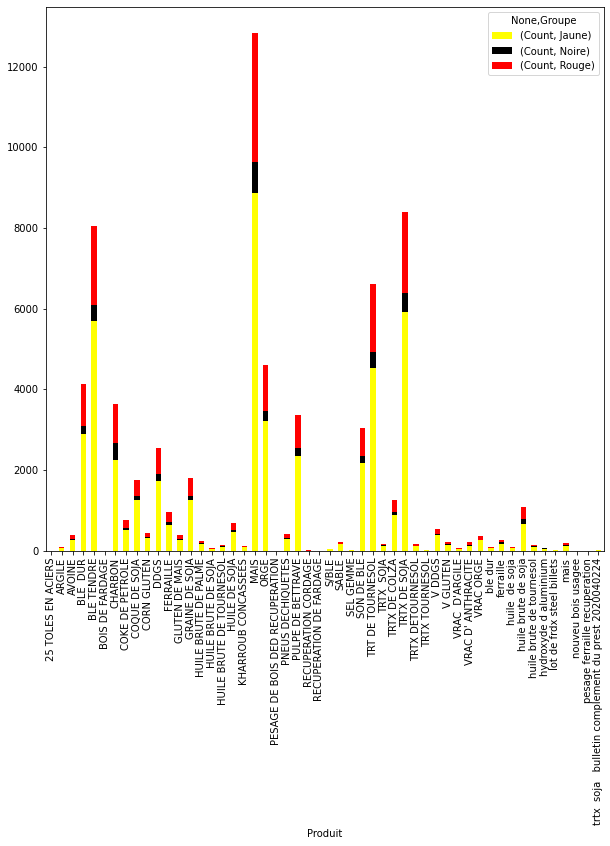

In [ ]:
groupat_prod=df.groupby(['Produit','Groupe']).count()
df_viz_prod = df[['Produit','Groupe','Count']]
dff_prod=df_viz_prod.groupby(['Produit','Groupe']).count()
df_vizual_prod = dff_prod.unstack()
df_vizual_prod.plot(figsize=(10,10),kind = 'bar', stacked = True,  color = ['yellow','black','red'])
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Produit'],df['Groupe']) # Table de contingence
results = chi2_contingency(table)
print('statistique du test :', results[0])
print('p-value :', results[1])
print('Degrés de liberté :', results[2])

statistique du test : 575.0460318969231
p-value : 4.607684037675825e-67
Degrés de liberté : 102


# Analyse par changement du pont de pesage

également ici on fait une analyse par le fait qu'un transportaur a changé de pont de pesage, alors on crée une caractéristique appélé diff qui va retourner True si un transporteur a changé de pont et False sinon et on trace un plot a bar dans lequel pour chaque caractéristique(True ou False) la fréquence de chaque groupe.

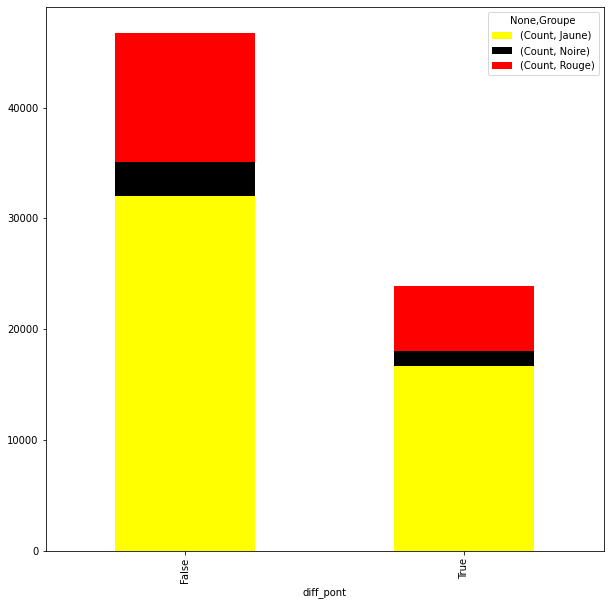

In [ ]:
diff=(df["Pont_entrée"] != df["pont_Sortie"])

df["diff_pont"]=diff
diff_pont =  df[['diff_pont','Groupe','Count']]
dff_diff=diff_pont.groupby(['diff_pont','Groupe']).count()
df_vizual_diff = dff_diff.unstack()
df_vizual_diff.plot(figsize=(10,10),kind = 'bar', stacked = True,  color = ['yellow','black','red'])
plt.show()


In [ ]:
table2 = pd.crosstab(df['diff_pont'],df['Groupe']) # Table de contingence
results2 = chi2_contingency(table2)
print('statistique du test :', results2[0])
print('p-value :', results[1])
print('Degrés de liberté :', results2[2])

statistique du test : 33.334478984529696
p-value : 4.607684037675825e-67
Degrés de liberté : 2


# Analyse par saisonnalité

Analyse par période covid

In [ ]:
from datetime import datetime
df_covid = pd.DataFrame(columns=["période_covid","Groupe"])

for i, j in df.iterrows():  
    date_entre = j[4].strftime("%m/%d/%Y")
    temps_entre=date_entre+", "+ j[5]
    temps_covid = "03/16/2020, 00:00"
    temps_covid=datetime.strptime(temps_covid, "%m/%d/%Y, %H:%M")
    temps_entre=datetime.strptime(temps_entre, "%m/%d/%Y, %H:%M")
    time_covid=(temps_entre<temps_covid)
    df_covid=df_covid.append({'période_covid' : time_covid, 'Groupe': j[13]},ignore_index = True)



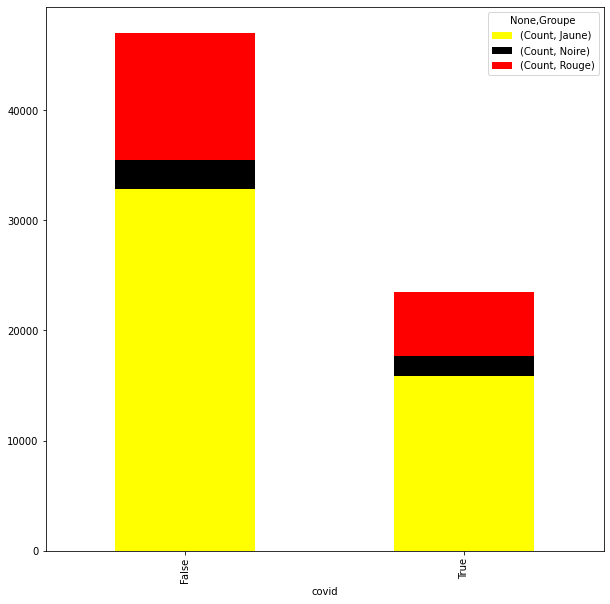

In [ ]:
df["covid"]=df_covid['période_covid']  
viz_cov=df[["covid","Groupe","Count"]]

dff_cov=viz_cov.groupby(['covid','Groupe']).count()
df_vizual_cov = dff_cov.unstack()
df_vizual_cov.plot(figsize=(10,10),kind = 'bar', stacked = True,  color = ['yellow','black','red'])
plt.show()

Analyse par mois

In [ ]:
df_season = pd.DataFrame(columns=["mois","Groupe"])
dict_mois={"01":"Janvier","02":"Février","03":"Mars","04":"Avril","05":"Mai","06":'Juin',"07":"Juillet","08":"Aout","09":"Septembre","10":"Octobre","11":"Novembre","12":"Decembre"}
for i, j in df.iterrows():  
    date_entre = j[4].strftime("%m/%d/%Y")
    mois=date_entre[0:2]
    df_season=df_season.append({'mois' : dict_mois[mois], 'Groupe': j[13]},ignore_index = True)

    

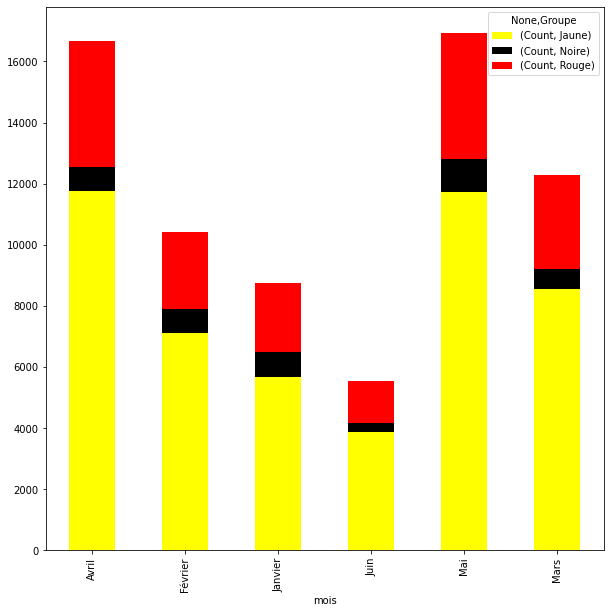

In [ ]:
df["mois"]=df_season['mois'] 
viz_mois=df[["mois","Groupe","Count"]]

dff_mois=viz_mois.groupby(['mois','Groupe']).count()
df_vizual_mois = dff_mois.unstack()
df_vizual_mois.plot(figsize=(10,10),kind = 'bar', stacked = True,  color = ['yellow','black','red'])
plt.show()

# Machine learning

Preprocessing de jeu de données

In [ ]:
df.head()

,Num_escale,Num_Vehicule,Num_REMORQUE,Num_Client,Date_entrée,Heure_entrée,Date_sortie,Heure_sortie,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie,Produit,Groupe,temps_datt,Count,diff_pont,covid,mois
0,Escale105,Vehicule1,Remorque1,Client1,2020-01-02,08:48,2020-01-02,06:58,43220,15760,14,14.0,TRTX DE SOJA,Jaune,0 days 00:01:50,1,False,True,Janvier
1,Escale106,Vehicule2,Remorque2,Client1,2020-01-02,08:47,2020-01-02,07:00,42460,16480,17,17.0,PULPE DE BETTRAVE,Jaune,0 days 00:01:47,1,False,True,Janvier
2,Escale106,Vehicule3,Remorque3,Client1,2020-01-02,11:17,2020-01-02,07:02,42940,16600,17,17.0,PULPE DE BETTRAVE,Noire,0 days 00:04:15,1,False,True,Janvier
3,Escale105,Vehicule4,Remorque4,Client1,2020-01-02,08:46,2020-01-02,07:03,42560,14700,14,14.0,TRTX DE SOJA,Jaune,0 days 00:01:43,1,False,True,Janvier
4,Escale106,Vehicule5,Remorque5,Client1,2020-01-02,10:05,2020-01-02,07:03,42020,16300,17,17.0,PULPE DE BETTRAVE,Jaune,0 days 00:03:02,1,False,True,Janvier


On élimine les valeurs Nan et pour concer un modèle de prédiction, on a besoin de rendre la data abordable par les algorithmes d'apprentissage automatique ce qui veut dire qu'on doit convertir toutes les variables en numériques grâce à un codage. On se base ici sur un Label Encoding qui s'est avéré mieux que le OneHot encoding en terme de performance du modèle.

In [ ]:
df.dropna(inplace=True)
df.describe()
#Label Encoding
categorical_features = ["Num_Vehicule","mois", "Num_REMORQUE","Produit","covid", "diff_pont", "Num_Client", "Num_escale"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in categorical_features : 
  df[feature]=le.fit_transform(df[feature])
df.head()


,Num_escale,Num_Vehicule,Num_REMORQUE,Num_Client,Date_entrée,Heure_entrée,Date_sortie,Heure_sortie,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie,Produit,Groupe,temps_datt,Count,diff_pont,covid,mois
0,7,0,0,0,2020-01-02,08:48,2020-01-02,06:58,43220,15760,14,14.0,33,Jaune,0 days 00:01:50,1,0,1,2
1,8,1111,1111,0,2020-01-02,08:47,2020-01-02,07:00,42460,16480,17,17.0,23,Jaune,0 days 00:01:47,1,0,1,2
2,8,1720,2222,0,2020-01-02,11:17,2020-01-02,07:02,42940,16600,17,17.0,23,Noire,0 days 00:04:15,1,0,1,2
3,7,1831,3333,0,2020-01-02,08:46,2020-01-02,07:03,42560,14700,14,14.0,33,Jaune,0 days 00:01:43,1,0,1,2
4,8,1942,3634,0,2020-01-02,10:05,2020-01-02,07:03,42020,16300,17,17.0,23,Jaune,0 days 00:03:02,1,0,1,2


In [ ]:
df['temps_datt']=60*time_df['Temps d’attente'].dt.total_seconds()
df.head()

,Num_escale,Num_Vehicule,Num_REMORQUE,Num_Client,Date_entrée,Heure_entrée,Date_sortie,Heure_sortie,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie,Produit,Groupe,temps_datt,Count,diff_pont,covid,mois
0,7,0,0,0,2020-01-02,08:48,2020-01-02,06:58,43220,15760,14,14.0,33,Jaune,6600.0,1,0,1,2
1,8,1111,1111,0,2020-01-02,08:47,2020-01-02,07:00,42460,16480,17,17.0,23,Jaune,6420.0,1,0,1,2
2,8,1720,2222,0,2020-01-02,11:17,2020-01-02,07:02,42940,16600,17,17.0,23,Noire,15300.0,1,0,1,2
3,7,1831,3333,0,2020-01-02,08:46,2020-01-02,07:03,42560,14700,14,14.0,33,Jaune,6180.0,1,0,1,2
4,8,1942,3634,0,2020-01-02,10:05,2020-01-02,07:03,42020,16300,17,17.0,23,Jaune,10920.0,1,0,1,2


On passe à l'étape classique de découpage de la dataset en deux groupes d'entrainement et tester avant de la passer à notre modèle.

In [ ]:
from sklearn.model_selection import train_test_split
targets = df.Groupe.astype("category")
targets.name = "target"
df.drop("Groupe", axis=1, inplace=True)
df.drop("Heure_sortie", axis=1, inplace=True)
df.drop("Date_sortie", axis=1, inplace=True)
df.drop("Heure_entrée", axis=1, inplace=True)
df.drop("Date_entrée", axis=1, inplace=True)
targets.dropna()
train_data, test_data, train_targets, test_targets = train_test_split(df, targets, test_size=0.2, random_state=42)


Pour une classification, beaucoup de modèle peuvent nous venir à l'esprit  : Logistic regression , svm, decision trees.. Néaumoins, ces derniers s'avèrent non performant à cause de la structure non équilibrée de la dataset sous nos mains. Ainsi, on a opté pour un modèle de Gradient boosting qui est généralement robuste et performant surtout pour les données tabulaire .

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Creer le Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Entrainement 
gb.fit(train_data, train_targets)

#Prediction
y_pred = gb.predict(test_data)
y_tpred = gb.predict(train_data)

Pour juger notre préformance on a opté pour l'accuracy du model

In [ ]:
from sklearn import metrics

print("accuracy training:",metrics.accuracy_score(train_targets, y_tpred))
print("accuracy test:",metrics.accuracy_score(test_targets, y_pred))

accuracy training: 0.69119209519762
accuracy test: 0.6865217083362845


Le code ci-dessous sert à optimiser la variable score qui retourne l'accuracy issue d'une validation croisée sur notre modèle Light Gradient Boosting Machine. Les hyperparamètres du modèle, renseignées par la variable space ci-dessous, sont réglés (fine-tuned) grâce à la librairie Hyperopt et passés à la fin au modèle grâce à la commande (**best, best étant le dictionnaires des arguments optimaux du modèles). 

In [ ]:
import hyperopt
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.model_selection import cross_val_score
from lightgbm.sklearn import LGBMClassifier
#Gradient boosting f1 cross validation :
def gb_f1_cv(params, random_state=42, cv=5, X=train_data, y=train_targets):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['num_leaves'] = int(params['num_leaves'])
    
    model = LGBMClassifier(random_state=42, **params)
    score = -cross_val_score(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1).mean()
    return score

space = {'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
         'n_estimators': hp.quniform('n_estimators', 100, 2000, 1),
         'max_depth' : hp.quniform('max_depth', 2, 20, 1),
         'num_leaves': hp.quniform('num_leaves', 31, 255, 4),
         'min_child_weight': hp.uniform('min_child_weight', 0.1, 10),
         'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.),
         'subsample': hp.uniform('subsample', 0.5, 1.),
         'reg_alpha': hp.uniform('reg_alpha', 0.001, 1),
         'reg_lambda': hp.uniform('reg_lambda', 0.001, 1)}
#Fine tuning hyperparameters of our model :
trials = Trials()
best = fmin(fn=gb_f1_cv, space=space, algo=tpe.suggest, max_evals=50, trials=trials, rstate=np.random.RandomState(42))
best['n_estimators'] = int(best['n_estimators'])
best['num_leaves'] = int(best['num_leaves'])
best['max_depth'] = int(best['max_depth'])
model = LGBMClassifier(random_state=42, categorical_feature=[0, 4, 5, 6, 8, 9, 10, 11], **best)
_ = model.fit(train_data,train_targets)

 10%|█         | 5/50 [08:15<1:21:03, 108.08s/it, best loss: -0.6862693122988438]

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



100%|██████████| 50/50 [1:08:23<00:00, 82.07s/it, best loss: -0.6903066991424734]


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:741: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score
train_preds = model.predict(train_data)
test_preds = model.predict(test_data)

train_score = metrics.accuracy_score(train_preds, train_targets)
test_score = metrics.accuracy_score(test_preds, test_targets)

print("Accuracy on train data : {:.2f}".format(train_score*100))
print("Accuracy on test data : {:.2f}".format(test_score*100))

Accuracy on train data : 69.19
Accuracy on test data : 68.51


On constate alors que cette accuracy est l'optimum pour notre model et vu notre data, Dans cette partie, on utilise feature_importances pour trier les variables en terme de leur significativité dans le modèle.La première partie de notre étude a mis en valeur ces variables à travers des visualisations ce qui rends le résultats logiques. Néaumoins, l'apparition de 'Num_esclale' comme variable importante est surprenant. 

In [ ]:
feature_importances = model.feature_importances_
feature_importances_dict = {}
for i in range(feature_importances.shape[0]) :
    feature_importances_dict[train_data.columns[i]] = feature_importances[i]
    
feature_importances_dict = {k: v for k, v in sorted(feature_importances_dict.items(), key=lambda item: item[1])}

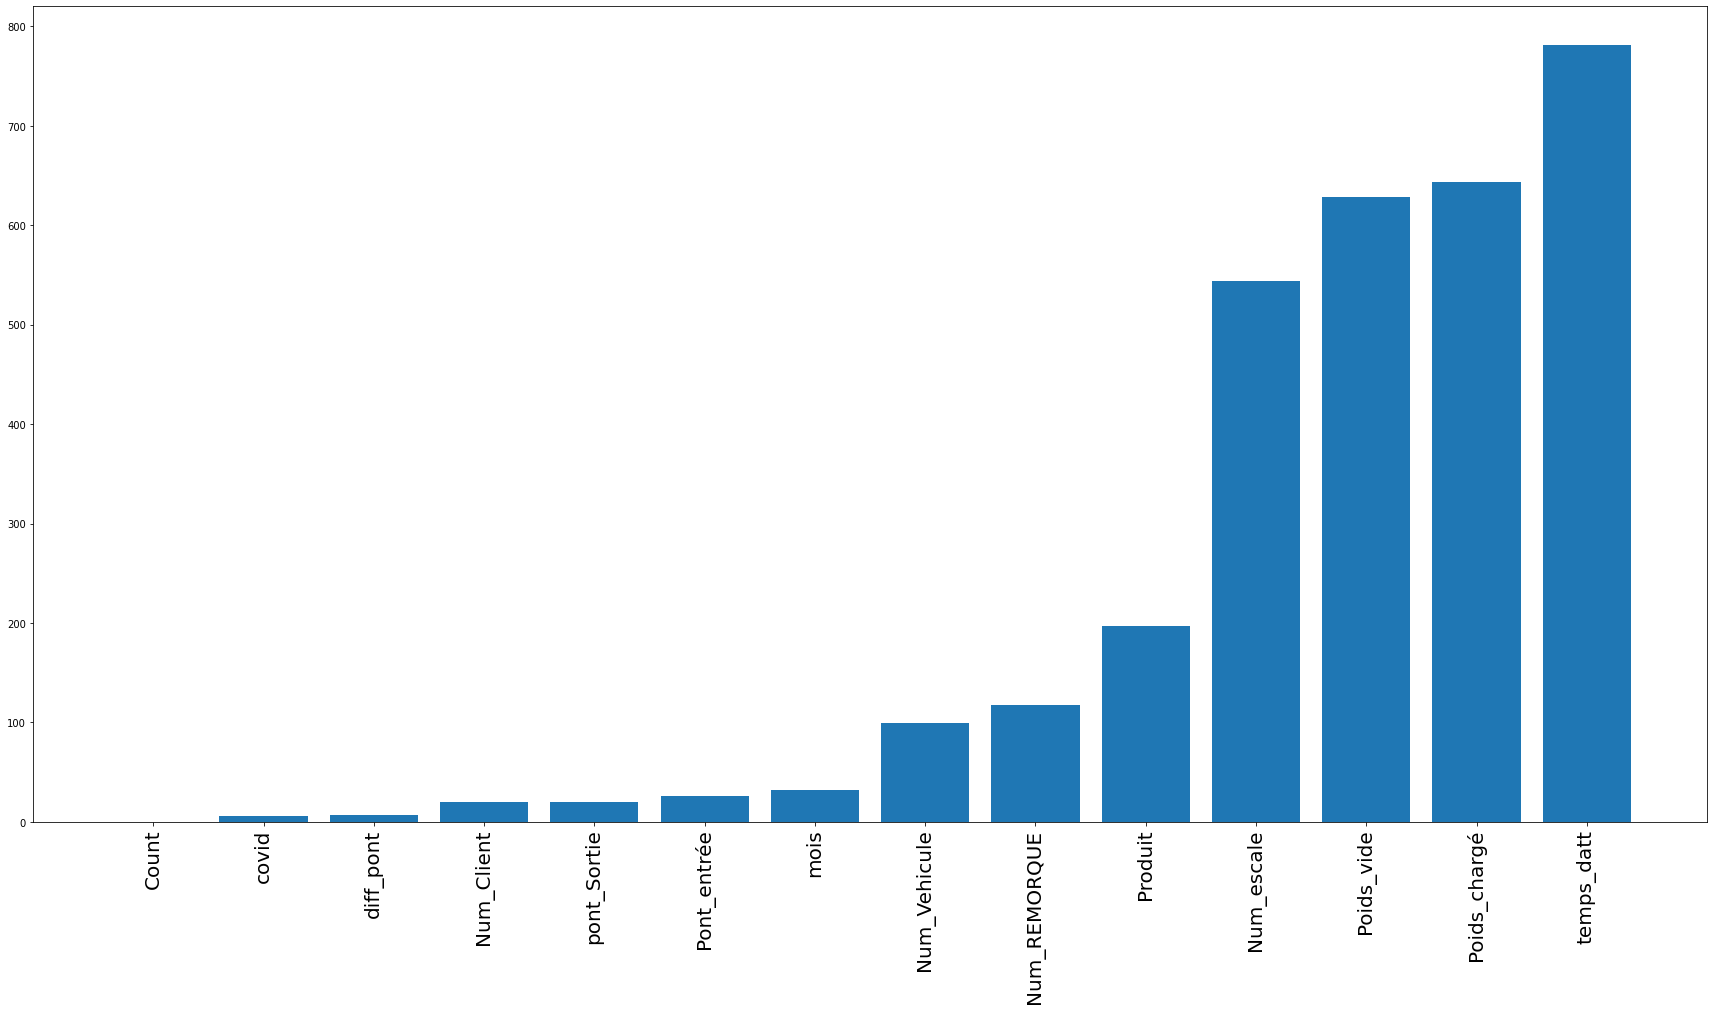

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 15))
ax.bar(*zip(*feature_importances_dict.items()))
ax.tick_params(axis='x', labelsize=20)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()